# II. Programming and critical analysis

Consider the winequality-red.csv dataset (available at the webpage) where the goal is to estimate
the quality (sensory appreciation) of a wine based on physicochemical inputs.

Using a 80-20 training-test split with a fixed seed (random_state=0), you are asked to learn MLP
regressors to answer the following questions.

Given their stochastic behavior, average the performance of each MLP from 10 runs
(for reproducibility consider seeding the MLPs with random_state ∈ {1. .10}).

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Reading the CSV file
df = pd.read_csv("winequality-red.csv", delimiter=";")
  
# Printing top 5 rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Some of the sklearn facilities require input data to be separated from output data
X = df.drop("quality", axis=1)
y = df["quality"]

In [4]:
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from math import sqrt

# Set random seed for reproducibility
np.random.seed(0)

In [5]:
# Split the data into training and test sets with a fixed seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Number of runs
num_runs = 10

## 1)
Learn a MLP regressor with 2 hidden layers of size 10, rectifier linear unit activation on all nodes, and early stopping with 20% of training data set aside for validation. All remaining parameters (e.g., loss, batch size, regularization term, solver) should be set as
default. Plot the distribution of the residues (in absolute value) using a histogram.

/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

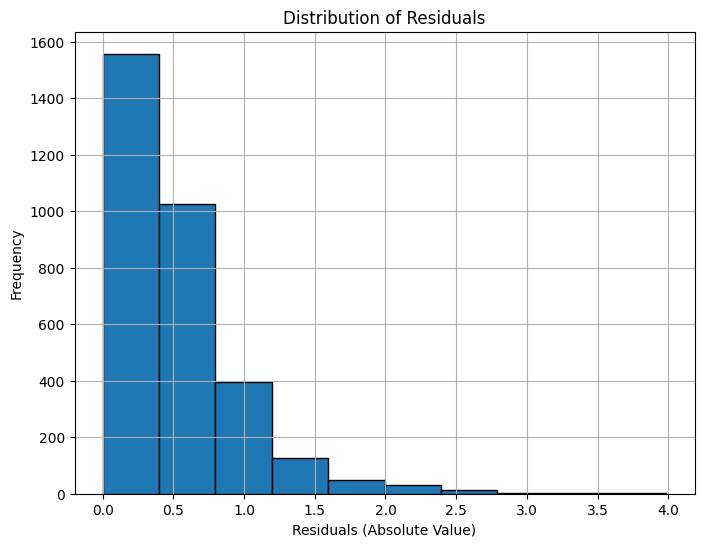

In [6]:
# Initialize an empty list to store residuals from each run
residuals = []

# Perform 10 runs
for random_state in range(1, num_runs + 1):
    # Initialize MLP Regressor with specified parameters
    mlp_regressor = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', early_stopping=True, validation_fraction=0.2, random_state=random_state)
    
    # Train the model
    mlp_regressor.fit(X_train, y_train)
    
    # Predict on the test set
    y_predictions = mlp_regressor.predict(X_test)
    
    # Calculate residuals
    residuals.append(np.abs(y_test - y_predictions))

# Concatenate residuals from all runs into a single array
all_residuals = np.concatenate(residuals)

# Plot the distribution of residuals using a histogram
plt.figure(figsize=(8, 6))
plt.hist(all_residuals, edgecolor='black')
plt.xlabel('Residuals (Absolute Value)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()


## 2)
Since we are in the presence of a integer regression task, a recommended trick is to round and bound estimates. Assess the impact of these operations on the MAE of the MLP learnt in previous question.

In [7]:
rounded_bounded_mae_values = []
mae_values = []

# Perform 10 runs
for random_state in range(1, num_runs + 1):
    # Initialize MLP Regressor with specified parameters
    mlp_regressor = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', early_stopping=True, validation_fraction=0.2, random_state=random_state)
    
    # Train the model
    mlp_regressor.fit(X_train, y_train)
    
    # Predict on the test set
    y_predictions = mlp_regressor.predict(X_test)
    
    # Calculate the MAE
    mae = mean_absolute_error(y_test, y_predictions)
    mae_values.append(mae)

    # Round and bound the estimates to integer values
    rounded_bounded_mae = mean_absolute_error(y_test, np.round(np.clip(y_predictions, 3, 8)))
    rounded_bounded_mae_values.append(rounded_bounded_mae)

# Calculate the average MAE across the 10 runs
average_mae = np.mean(mae_values)
average_rounded_bounded_mae = np.mean(rounded_bounded_mae_values)

# Print the results
print(f"Average MAE: {average_mae}")
print(f"Average MAE after rounding and bounding: {average_rounded_bounded_mae}")


/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

Average MAE: 0.5097171955009514
Average MAE after rounding and bounding: 0.43875000000000003


/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## 3) 
Similarly assess the impact on RMSE from replacing early stopping by a well-defined number of iterations in {20,50,100,200} (where one iteration corresponds to a batch).

In [8]:
num_iterations = [20, 50, 100, 200]

# Initialize dictionaries to store RMSE for each number of iterations
rmse_results = {iteration: [] for iteration in num_iterations}

# Perform 10 runs for each random state
for random_state in range(1, num_runs + 1):
    # Split the data into training and testing sets with a fixed seed
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    for iteration in num_iterations:
        # Create and train an MLP Regressor with the specified number of iterations
        mlp = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=iteration, random_state=random_state)
        mlp.fit(X_train, y_train)
        
        # Make predictions
        y_pred = mlp.predict(X_test)
        
        # Calculate RMSE
        rmse = sqrt(mean_squared_error(y_test, y_pred))
        
        # Store RMSE in the results dictionary
        rmse_results[iteration].append(rmse)

# Calculate the average RMSE for each number of iterations
average_rmse = {iteration: np.mean(rmse_list) for iteration, rmse_list in rmse_results.items()}

# Print the results
for iteration, avg_rmse in average_rmse.items():
    print(f'Number of Iterations: {iteration}, Average RMSE: {avg_rmse}')

/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.w

Number of Iterations: 20, Average RMSE: 0.6734811876108063
Number of Iterations: 50, Average RMSE: 0.6580161243286237
Number of Iterations: 100, Average RMSE: 0.658612016949484
Number of Iterations: 200, Average RMSE: 0.6672277111392482


In [10]:
# Define the number of iterations (batches) you want to test
num_iterations = [20, 50, 100, 200]

# Initialize dictionaries to store RMSE for each number of iterations
rmse_results = {iteration: [] for iteration in num_iterations}

# Define the number of runs with a fixed random state
num_runs = 10

# Split the data into training and testing sets with a fixed seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

for random_state in range(1, num_runs + 1):
    for iteration in num_iterations:
        # Create and train an MLP Regressor with the specified number of iterations
        mlp = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=iteration, early_stopping=False, random_state=random_state)
        mlp.fit(X_train, y_train)
        
        # Make predictions
        y_pred = mlp.predict(X_test)
        
        # Calculate RMSE
        rmse = sqrt(mean_squared_error(y_test, y_pred))
        
        # Store RMSE in the results dictionary
        rmse_results[iteration].append(rmse)

# Calculate the average RMSE for each number of iterations
average_rmse = {iteration: np.mean(rmse_list) for iteration, rmse_list in rmse_results.items()}

# Print the results
for iteration, avg_rmse in average_rmse.items():
    print(f'Number of Iterations: {iteration}, Average RMSE: {avg_rmse}')

/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ana/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.w

Number of Iterations: 20, Average RMSE: 0.717133197821241
Number of Iterations: 50, Average RMSE: 0.6996584066731197
Number of Iterations: 100, Average RMSE: 0.6919099367329464
Number of Iterations: 200, Average RMSE: 0.6887621514642002


## 4)
Critically comment the results obtained in previous question, hypothesizing at least one reason why early stopping favors and/or worsens performance.